In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df=pd.read_csv("Algerian_forest_fires_Cleaned_dataset.csv")

In [52]:

df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [53]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [54]:
## Drop Day, Month, Year
df.drop(['day','month','year'],axis=1,inplace=True)

#### Encoding

In [55]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [56]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [57]:
## Dividing Features into Independent and Dependent
X=df.drop('FWI',axis=1)
y=df['FWI']

In [58]:

X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [59]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
X_train.shape,X_test.shape

((162, 11), (81, 11))

#### Feature Selection Based on Correlation

In [62]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


<Axes: >

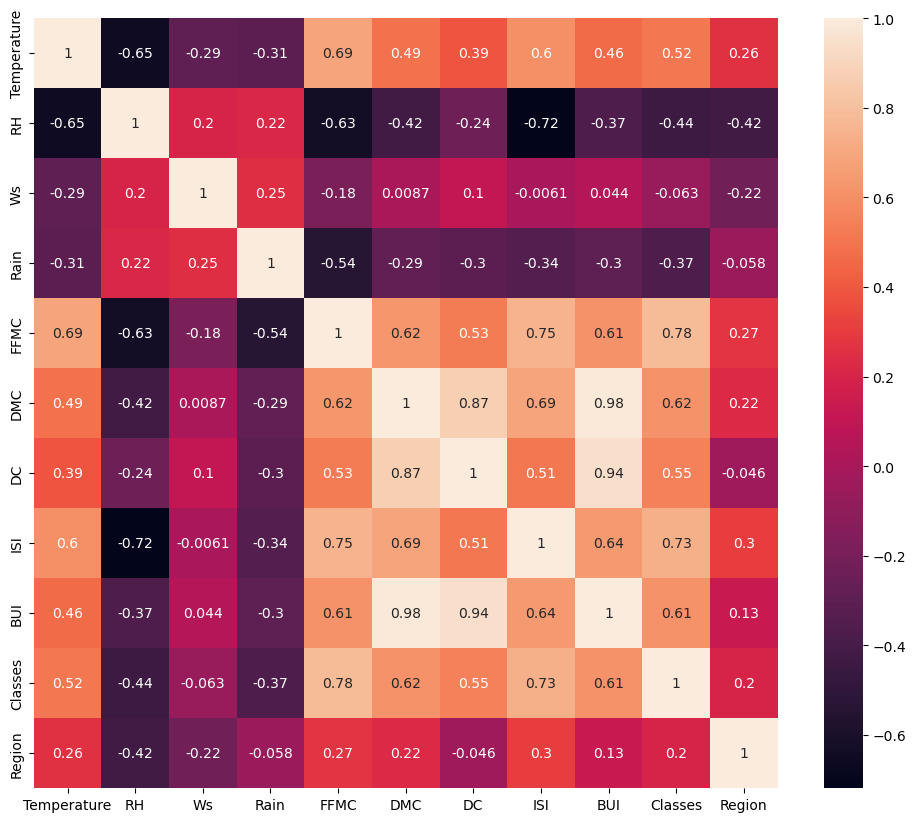

In [63]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [64]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [65]:
## threshold-
corr_features=correlation(X_train,0.85)

In [66]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((162, 9), (81, 9))

### Feature Scaling Or Standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [68]:
X_train_scaled


array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.11433646,
         0.90566259,  0.9877296 ],
       [ 0.52256258,  0.1473255 , -0.98795537, ...,  0.09352209,
         0.90566259, -1.01242284],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.09352209,
         0.90566259,  0.9877296 ],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06124763,
        -1.10416397, -1.01242284],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.60162077,
         0.90566259,  0.9877296 ],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.85338908,
        -1.10416397, -1.01242284]])

#### Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

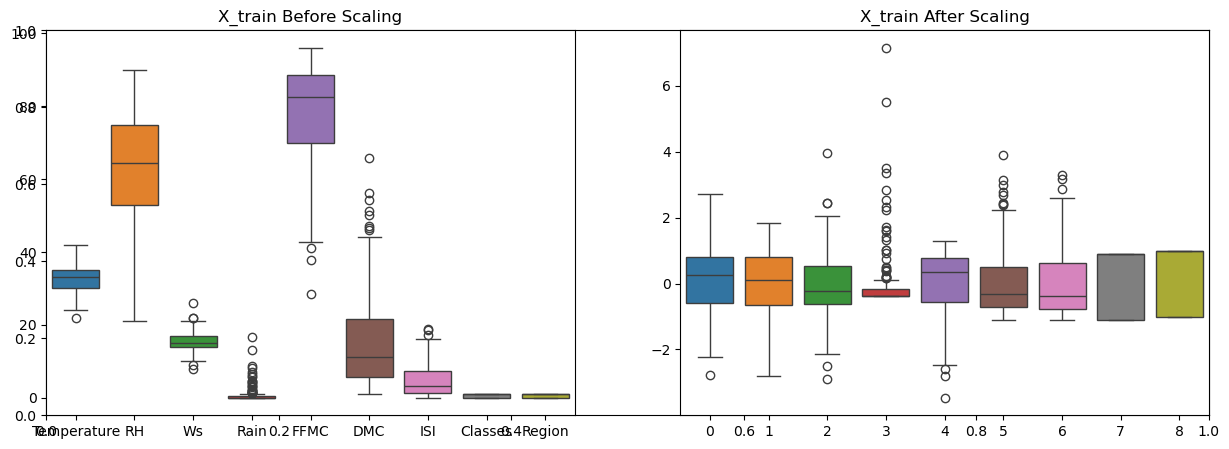

In [72]:

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### LinearRegression

Mean absolute error 0.5767877823415978
R2 Score 0.9845563190792226


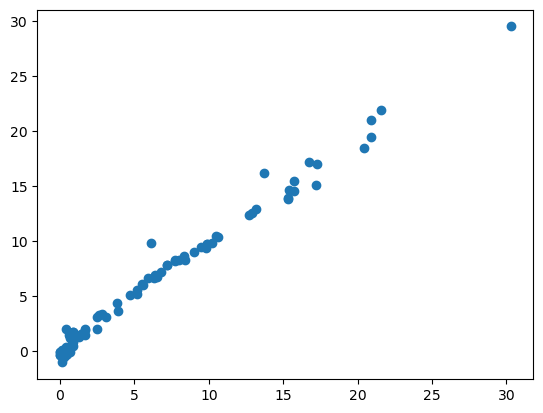

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean absolute error 1.1053469612945108
R2 Score 0.9514102148198662


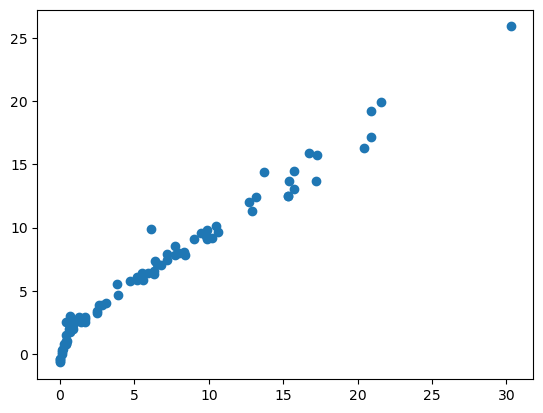

In [74]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [75]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [76]:
lassocv.alpha_

0.03318346689607894

In [77]:
lassocv.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091

In [78]:
lassocv.mse_path_

array([[63.67571316, 63.6745843 , 62.46279749, 72.0204942 , 39.28646701],
       [58.66266666, 57.2838259 , 57.50830135, 65.75315542, 34.84471157],
       [51.58741201, 51.12096068, 52.45127415, 60.21573702, 30.45060981],
       [45.4059877 , 45.84733465, 45.95091529, 55.31898965, 26.3309357 ],
       [40.00389599, 40.51190805, 40.28757672, 50.98489633, 22.76820373],
       [35.28126747, 35.58867985, 35.35295492, 47.14523581, 19.68820203],
       [31.15135478, 31.34252972, 31.05261065, 43.74033136, 17.02719593],
       [27.53840615, 27.68251373, 27.30455949, 39.59676043, 14.72921396],
       [24.37649918, 24.5308825 , 24.03739251, 34.86397602, 12.74586476],
       [21.60812103, 21.81889255, 21.18904401, 30.73650092, 11.03513468],
       [19.18340697, 19.4873161 , 18.70526615, 27.13601398,  9.56055199],
       [17.05865794, 17.48477246, 16.53907892, 23.99367344,  8.2903111 ],
       [15.19587183, 15.76617873, 14.64951511, 21.25230889,  7.19726417],
       [13.56192436, 14.29397744, 13.0

Mean absolute error 0.6041813665539068
R2 Score 0.983629786213086


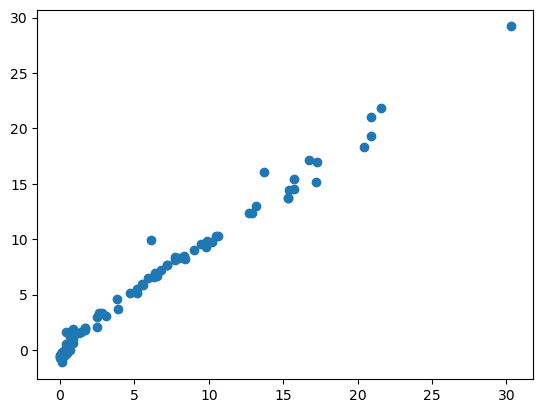

In [79]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

### Ridge Regression

Mean absolute error 0.5953582907340879
R2 Score 0.9839564989246833


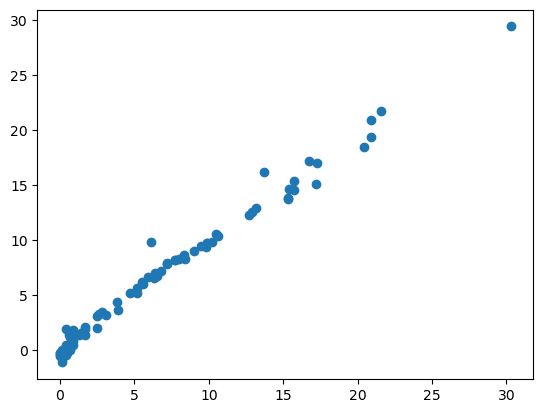

In [80]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Ridge

Mean absolute error 0.5953582907340879
R2 Score 0.9839564989246833


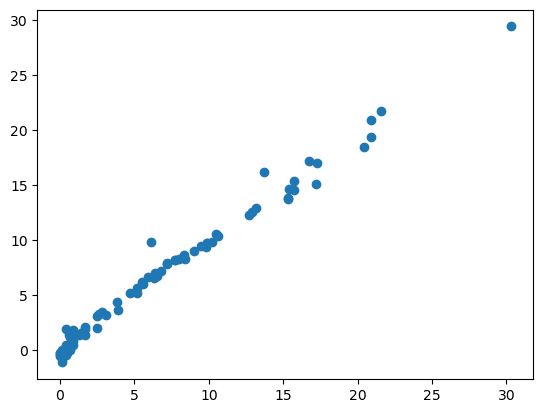

In [81]:

from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [82]:

ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elasticnet Regression

Mean absolute error 1.834545337587552
R2 Score 0.8825431896054334


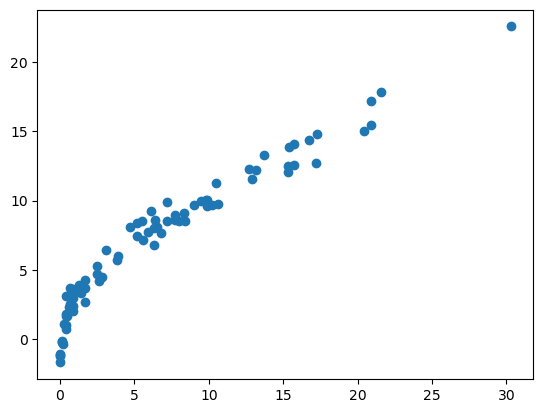

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation ElasticNet

Mean absolute error 0.6264581775240788
R2 Score 0.9829634557249401


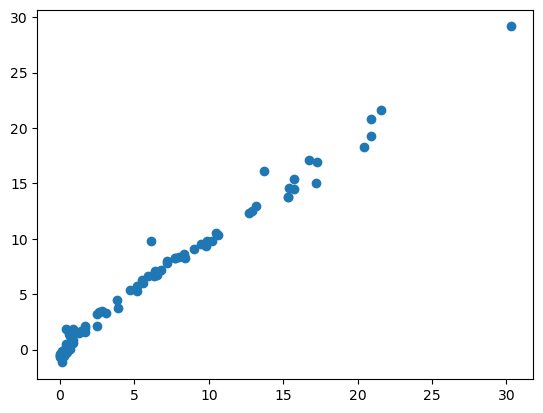

In [84]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [85]:

elasticcv.alphas_

array([14.29832244, 13.33466337, 12.43595168, 11.59781016, 10.81615657,
       10.08718382,  9.40734139,  8.77331807,  8.18202579,  7.63058464,
        7.11630877,  6.63669338,  6.18940246,  5.77225745,  5.38322661,
        5.02041516,  4.68205598,  4.36650108,  4.07221352,  3.79775996,
        3.54180365,  3.30309793,  3.08048019,  2.87286613,  2.67924457,
        2.49867245,  2.33027029,  2.17321787,  2.02675026,  1.89015408,
        1.76276402,  1.64395963,  1.53316225,  1.42983224,  1.33346634,
        1.24359517,  1.15978102,  1.08161566,  1.00871838,  0.94073414,
        0.87733181,  0.81820258,  0.76305846,  0.71163088,  0.66366934,
        0.61894025,  0.57722574,  0.53832266,  0.50204152,  0.4682056 ,
        0.43665011,  0.40722135,  0.379776  ,  0.35418036,  0.33030979,
        0.30804802,  0.28728661,  0.26792446,  0.24986725,  0.23302703,
        0.21732179,  0.20267503,  0.18901541,  0.1762764 ,  0.16439596,
        0.15331622,  0.14298322,  0.13334663,  0.12435952,  0.11